## Problem Statement
In this assignment students have to find the frequency of words in a webpage. User can
use urllib and BeautifulSoup to extract text from webpage.


In [1]:
pip install beautifulsoup4


In [0]:
import nltk
import urllib.request
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Fetching url and the html

In [0]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [4]:
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="https://www.php.net/index.php">\n <link rel="shorturl" href="https://www.php.net/index">\n <link rel="alternate" href="https://www.php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" medi

In [5]:
print(soup.title)
print(soup.title.string)

<title>PHP: Hypertext Preprocessor</title>
PHP: Hypertext Preprocessor


# Extracting text
finding tokens

In [0]:
#text= soup.find('body').get_text(strip=True)     for body text
text = soup.get_text()
#tokens = [t for t in text.split()]   # words list 

# or by re

tokens = re.findall('\w+', text)

In [24]:
tokens[:15]   # printing words list

['PHP',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting',
 'Started',
 'Introduction',
 'A',
 'simple',
 'tutorial',
 'Language']

### converting tokens to lower case

In [17]:
words = []
for word in tokens:
  words.append(word.lower())
words[:5]
  

['php', 'hypertext', 'preprocessor', 'downloads', 'documentation']

## Removing Stopwords

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stopWords = nltk.corpus.stopwords.words('english')
stopWords[:5]

['i', 'me', 'my', 'myself', 'we']

In [27]:
print("Total including stopwords:", len(words))
clean_words = []
for w in words:
  if w not in stopWords:
    clean_words.append(w)
    
print("Length after stopwords:", len(clean_words) )
print("Total removed stopwords:", len(words)-len(clean_words) )
clean_words[:24]
    

Total including stopwords: 5249
Length after stopwords: 3379
Total removed stopwords: 1870


['php',
 'hypertext',
 'preprocessor',
 'downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'simple',
 'tutorial',
 'language',
 'reference',
 'basic',
 'syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control',
 'structures']

# words Frequency distribution

  - Total count
  - unique(vocab)
  - lexical diversity
  - most common
  - max count word
  - A list of all hapax legomena (words that only appear one time in the corpus).
  - counts.freq(): The percentage of the corpus for the given token.
  - counts.plot(): Plot the frequencies of the n most commonly occuring words.

In [30]:
counts  = nltk.FreqDist(clean_words)
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)
print("Text has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Text has 369 types and 3379 tokens for a lexical diversity of 9.157


In [33]:
print(counts.most_common(10))

[('php', 266), ('7', 157), ('release', 142), ('3', 93), ('found', 92), ('upgrading', 63), ('please', 63), ('file', 62), ('version', 60), ('0', 57)]


In [35]:
print(counts.max())

php


In [36]:
print(counts.hapaxes()[0:10])

['hypertext', 'preprocessor', 'documentation', 'get', 'involved', 'getting', 'started', 'simple', 'tutorial', 'syntax']


In [39]:
counts.freq('php'), counts.freq('hypertext'),

(0.07872151524119562, 0.0002959455460195324)

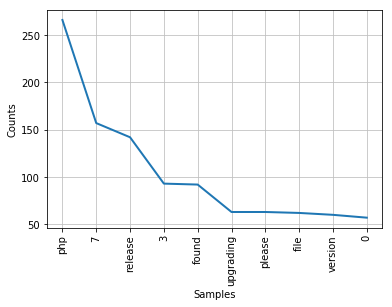

In [44]:
counts.plot(10, cumulative=False)


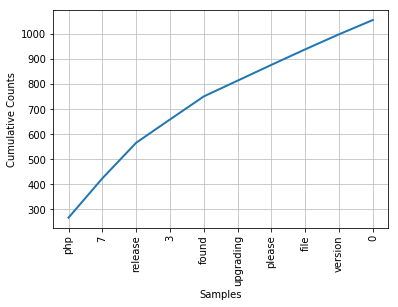

In [45]:
counts.plot(10, cumulative=True)

In [0]:
#ref: https://www.analyticsindiamag.com/using-natural-language-processing-to-check-word-frequency-in-the-adventure-of-sherlock-holmes/